# IMDB dataset 

* It's a binary classification problem on movie reviews
* A set of 50,000 highly polarized reviews from the Internet Movie Database. They’re split into 25,000 reviews for training and 25,000 reviews for testing, each set consisting of 50% negative and 50% positive reviews.

* IMDB dataset comes packaged with Keras. It has already been preprocessed: the reviews (sequences of words) have been turned into sequences of integers(ranks based on frequence), where each integer stands for a specific word in a dictionary.

In [1]:
import numpy as np
from keras.datasets import imdb
from keras import models
from keras import layers
import matplotlib.pyplot as plt

C:\Users\vipul\Anaconda3\lib\site-packages\h5py\__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


### 1.Loading the dataset

In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=15000)

* The parameter **num_words=15000** means you’ll only keep the top 15,000 most frequently
 occurring words in the training data. Rare words will be discarded. This allows
 you to work with vector data of manageable size.

In [3]:
train_data[0] #the train data is already preprocessed , that mean we only have the rank of the words based on frequency.

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 10311,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 12118,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 55

### 2.Data preparation
* You can’t feed lists of integers into a neural network. You have to turn your lists into tensors.We use One-hot encoding to convert the reviews into vectors of 0s and 1s.

In [4]:
def vectorizer(sequences, dimension=15000):
    # Creates an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [5]:
x_train = vectorizer(train_data) # Vectorize training data
x_test = vectorizer(test_data) # Vectorize test data

In [6]:
#vectorizing the labels 
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

### 3.Building the model

In [19]:
model=models.Sequential()
model.add(layers.Dense(64,activation='relu',input_shape=(15000,)))
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(1,activation='tanh'))

In [25]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [26]:
# create a validation set by setting apart 10,000 samples from the original training data.
x_val = x_train[:15000]
partial_x_train = x_train[15000:]

y_val = y_train[:15000]
partial_y_train = y_train[15000:]

In [27]:
test_model = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 10000 samples, validate on 15000 samples
Epoch 1/20
10000/10000 [==============================] - 10s 972us/step - loss: 0.7668 - acc: 0.6109 - val_loss: 0.5013 - val_acc: 0.7859
Epoch 2/20
10000/10000 [==============================] - 4s 444us/step - loss: 0.3378 - acc: 0.8921 - val_loss: 0.3557 - val_acc: 0.8695
Epoch 3/20
10000/10000 [==============================] - 4s 420us/step - loss: 0.1883 - acc: 0.9414 - val_loss: 0.3429 - val_acc: 0.8781
Epoch 4/20
10000/10000 [==============================] - 4s 424us/step - loss: 0.1146 - acc: 0.9632 - val_loss: 0.4149 - val_acc: 0.8677
Epoch 5/20
10000/10000 [==============================] - 4s 440us/step - loss: 0.0709 - acc: 0.9501 - val_loss: 0.4558 - val_acc: 0.8346
Epoch 6/20
10000/10000 [==============================] - 4s 426us/step - loss: 0.0451 - acc: 0.9099 - val_loss: 0.4675 - val_acc: 0.7976
Epoch 7/20
10000/10000 [==============================] - 4s 416us/step - loss: 0.0310 - acc: 0.8741 - val_loss: 0.5376 -

### 4. let's plot.

In [30]:
history_dict = test_model.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

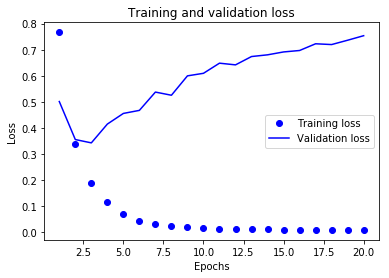

In [32]:
train_loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['acc']) + 1)

plt.plot(epochs, train_loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

* as we can see the model give least loss when the no. of epochs are 3 after that it is overfitting.

### 5.final model

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(15000,)))
model.add(layers.Dense(32, activation='relu'))
model.add(layers.Dense(1, activation='tanh'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3, batch_size=512)
results = model.evaluate(x_test, y_test)

Epoch 1/3
25000/25000 [==============================] - 6s 248us/step - loss: 0.7514 - acc: 0.7044
Epoch 2/3
25000/25000 [==============================] - 6s 245us/step - loss: 0.2836 - acc: 0.9056
Epoch 3/3
25000/25000 [==============================] - 11s 448us/step


In [34]:
results

[0.48843979853630065, 0.8644]

* as you can see the bit difference between training acc(93%) and testing acc(86%) which means the model is bit overfitting but this is by far the best acc. i got , you can tune it more by changing hyperparameters.

### 6. Prediction on test data
After having trained a network, you’ll want to use it in a practical setting. You can generate the likelihood of reviews being positive by using the predict method:

In [35]:
model.predict(x_test)

array([[0.43963727],
       [0.99779546],
       [0.3725262 ],
       ...,
       [0.12591572],
       [0.01595698],
       [0.87717104]], dtype=float32)

* As you can see, the network is confident for some samples (0.99 or 0.01 or less) but less confident for others (0.43, etc.)
* which means the prob. of this review belonging to class 1 is 44% ,class 2 is 99% and class 3 is 37% , therefore this reviews is of class 2. 